# Plot the data
Read the file ["Readme.ipynb"](Readme.ipynb) for more information.

## Modules
Needed to use non-Python functionalities already programmed by someone else.

In [1]:
# Used to cast the polygons into np.arrays and afterwards transpose them easily with the .T function
import numpy as np
import matplotlib.pyplot as plt    # to plot the counties

## Control
Set variables to "True" to trigger the action described by the comment and the variable's name.

In [2]:
# Determines what array shifts are allowed:
# The shifts represent the time delays in days;
# The time delay with the highest probability of correlation represents
# the number of days after which the numbers of one county show a similar development
# as the numbers of another county.
max_shift = 30
test_get_scaled_correlation_with_sinus = False

## Function to calculate the probability of correlations between two arrays

In [3]:
def get_scaled_correlation(array1, array2, return_all_shifts = False):
    if len(array1) != len(array2):
        print("The given arrays seem to have different lengths, this might cause problems.")

    # create array with the probabilities for a correlation between
    # array1 and array2 for every shift possible
    correlations = np.correlate(array1, array2, mode="full")
    

    # Get the number of products
    max_number_of_products = min(len(array1), len(array2))
    number_of_products = np.concatenate((
        np.arange(1, max_number_of_products),    # start of array2 left from start of array1
        np.full_like(np.arange(abs(len(array2)-len(array1))), max_number_of_products),
        np.arange(max_number_of_products, 0, -1)    # end of array2 right from end of array1
    ), axis=None)

    # Generate the array containing the shift of array2 relative to array1
    position_array2_to_array1 = np.append(np.arange(-len(array2) + 1, 0),
                                          np.arange(0, len(array1)))

    if (len(correlations) != len(position_array2_to_array1) or
        len(correlations) != len(number_of_products)):
        raise Exception("The output arrays of the get_scaled_correlation-function " +
                        "do not have the same length.")

    if return_all_shifts:
        # Scale by dividing by the number of products
        correlations = correlations // number_of_products
        return (correlations, number_of_products, position_array2_to_array1, 
                position_array2_to_array1[np.argmax(correlations)])
    borders = (np.where(position_array2_to_array1 == -max_shift)[0][0], 
               np.where(position_array2_to_array1 == max_shift)[0][0] + 1)
    # Scale by dividing by the number of products
    correlations = (correlations[borders[0]:borders[1]] //
                    number_of_products[borders[0]:borders[1]])
    return(
        correlations,
        number_of_products[borders[0]:borders[1]],
        position_array2_to_array1[borders[0]:borders[1]],
        position_array2_to_array1[np.argmax(correlations) + borders[0]]
    )

-1
(should be 0. In this case shifting by -1 and 1 produces bigger correlation probabilities, because the discrete values of the sinus are asymmetrical.)
[14484 14544 14599 14650 14696 14737 14774 14806 14833 14855 14872 14884
 14891 14894 14891 14894 14891 14884 14872 14855 14833 14806 14774 14737
 14696 14650 14599 14544 14484]
[ 986  987  988  989  990  991  992  993  994  995  996  997  998  999
 1000  999  998  997  996  995  994  993  992  991  990  989  988  987
  986]
[-14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3
   4   5   6   7   8   9  10  11  12  13  14]


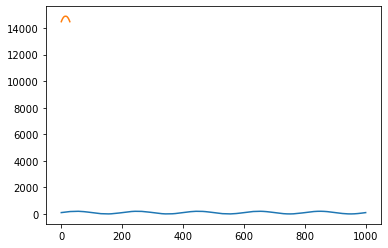

In [4]:
if test_get_scaled_correlation_with_sinus:
    sinus = [int(100*(e+1)) for e in np.sin(np.linspace(0,np.pi*10,1000))]
    plt.plot(sinus)
    print(get_scaled_correlation(sinus, sinus)[3])
    print("(should be 0. In this case shifting by -1 and 1 produces bigger correlation " +
          "probabilities, because the discrete values of the sinus are asymmetrical.)")
    print(get_scaled_correlation(sinus, sinus)[0])
    print(get_scaled_correlation(sinus, sinus)[1])
    print(get_scaled_correlation(sinus, sinus)[2])
    plt.plot(get_scaled_correlation(sinus, sinus)[0])